In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import dask

import shapely
import geopandas as gpd
import salem

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
main = xr.open_zarr('/mnt/efs/data/ecco/zarr/eccov4r3_output/').rename({'face': 'tile'})

In [3]:
budgSln = xr.open_zarr('/mnt/efs/data/ecco/zarr/anom/budgSln/').rename({'face': 'tile'})

In [4]:
def get_gdf_patch(coords_patch):
    # Replace each pair of points by 10 points for projected map
    geometry = []
    segments = zip(coords_patch[:-2:2], coords_patch[1:-1:2], coords_patch[2::2], 
                   coords_patch[3::2])
    
    for line in [shapely.geometry.LineString([(x1, y1), (x2, y2)]) for (x1,y1,x2,y2) in segments]:
        for length in np.linspace(0,1,11):
            geometry.append( line.interpolate(length, normalized=True) )
        
    gdf_patch = gpd.GeoDataFrame([], geometry=geometry)
    
    # Convert Points to Polygo
    gdf_patch['geometry'] = gdf_patch['geometry'].apply(lambda x: x.coords[0])
    
    gdf_patch['shape_id'] = 0
    gdf_patch = gdf_patch.groupby('shape_id')['geometry'].apply(lambda x: shapely.geometry.Polygon(x.tolist())).reset_index()
    gdf_patch = gpd.GeoDataFrame(gdf_patch, geometry = 'geometry')
    
    # Salem uses this attribute:
    gdf_patch.crs = {'init': 'epsg:4326'}
    
    return gdf_patch

In [5]:
coords_SB = [-53., 47.46182,-52., 47.46182,-51., 47.46182,-50., 47.46182,-50., 48.12596,-49., 48.12596,-48., 48.12596,
             -47., 48.12596,-46., 48.12596,-45., 48.12596,-44., 48.12596,-43., 48.12596,-42., 48.12596,-41., 48.12596,
             -40., 48.12596,-39., 48.12596,-38., 48.12596,-37., 48.12596,-36., 48.12596,-35., 48.12596,-34., 48.12596,
             -33., 48.12596,-33., 47.46182,-32., 47.46182,-31., 47.46182,-30., 47.46182,-29., 47.46182,-28., 47.46182,
             -27., 47.46182,-26., 47.46182,-26., 46.78843,-25., 46.78843,-24., 46.78843,-23., 46.78843,-22., 46.78843,
             -22., 46.105774,-21., 46.105774,-20., 46.105774,-19., 46.105774,-18., 46.105774,-18., 45.41385,
             -17., 45.41385,-16., 45.41385,-15., 45.41385,-15., 44.712654,-14., 44.712654,-13., 44.712654,
             -13., 44.0022,-12., 44.0022,-11., 44.0022,-10., 44.0022,-10., 43.282494,-9.,43.282494]
coords_SB_to_EC = [-1.,43.282494,-1.,48.78087]
coords_EC = [-5.,48.78087,-5.,50.063072]
coords_EC_to_FS = [-5.,51.917812,-3.,51.917812,-3.,56.470177]
coords_FS = [-5.0209107, 58.686825,-5.037469 , 59.2385  ,-5.0590353, 59.784798,-5.085762 , 60.325672,
             -5.1178174 , 60.861084,-6.125942 , 60.84489 ,-6.166107, 61.37257,-6.2123857, 61.894703]
coords_IF = [-7.2812705, 62.386726,-7.344147, 62.895226,-8.362914, 62.86655,-8.436943, 63.36676,-9.458087, 63.333656,
             -10.47765, 63.298805,-10.567438, 63.787502,-11.588718,63.747887,-11.691477, 64.22754,
             -12.714039, 64.18291,-13.733949, 64.13652,-13.853814, 64.6033]
coords_DeS = [-24.503857, 65.66525,-24.697086, 66.05268,-25.656406, 65.969666,-26.60553, 65.88757,-26.80609, 66.25563,
              -27.73846 , 66.169136 ,-27.949457 , 66.52263 ,-28.86185 , 66.431946 ,-29.760134 , 66.34398,
              -29.971338 , 66.6755 ,-30.843836 , 66.58435 ,-31.699657 , 66.49765,-31.904171 , 66.80529 ,
              -32.727146 , 66.71687 ,-32.934757 , 67.00616 ,-33.719128 , 66.91664]
coords_DaS = [-54.23812 , 66.30245 ,-55.23425 , 66.384575 ,-55.432312 , 65.97625 ,-56.435608 , 66.052315 ,
              -57.4459 , 66.127075 ,-58.462845 , 66.20026 ,-59.486107 , 66.27162 ,-60.515358 , 66.34096 ,
              -60.687084 , 65.90322 ,-61.71775 , 65.96633]
coords_DaS_to_HS = [-65.88552 , 66.14171 , -65.522354 , 63.298805 ]
coords_HS = [-65.74028 , 61.797977, -65.796906, 61.28634 , -65.84604 , 60.769142, -65.88795, 60.24646,
             -65.922874 , 59.71838]
coords_HS_to_LG = [-65.461975,58.910896,-60,54,-56.5,52.814613]
coords_LG_to_SB = [-56.5,48.454567,-53., 47.46182]
coords_DeS_to_FrS = [-34.48089 , 66.8355,-35.11053 , 67.57883,-20.932653 , 78.87449]
coords_FrS = [-19.186508 , 79.03997,-17.391916 , 79.19493,-15.550275 , 79.33904,-13.663382 , 79.47198,
              -11.733448 , 79.5934,-11.066698 , 79.211174,-9.158151 , 79.31644,-7.2162747 , 79.40999,
              -5.244295 , 79.49161,-3.2457807 , 79.561066,-1.224616 , 79.618164,-0.9266135 , 79.21572,
              1.0404158 , 79.2584,3.0199282 , 79.28907,5.007849 , 79.30747,7.0 , 79.31361,8.992151 , 79.30747,
              10.980072 , 79.28907]
coords_FrS_to_SvN = [16.877235 , 79.16097,16.069956,76.879066]
coords_SvN = [16.739313, 76.64243, 16.468266, 76.222755, 18.017347, 76.16335, 17.723822, 75.74302,
              17.448696, 75.31985, 18.910137, 75.25662, 18.618252, 74.83322, 18.34467, 74.40739, 19.729927, 74.3413,
              19.444464, 73.91592, 19.177204, 73.48885, 18.92733, 73.06082, 20.221594, 72.99534, 19.96517, 72.569916,
              19.726929, 72.14657, 20.968075, 72.07988, 20.731846, 71.66982, 20.513678, 71.26436, 20.307493, 70.85302,
              21.488281, 70.78876, 21.278511, 70.37436]
coords_SvN_to_SN = [21.080824 , 69.95405,20.894821 , 69.52784,7.0 , 61.499973]
coords_SN = [4.9789214 , 60.954185 ,3.9684584 , 60.95079 ,3.9770377 , 60.40301,2.9694877 , 60.398922,
             2.9789946 , 59.846252,1.9738591 , 59.84185,0.96880066 , 59.836487,0.9801969 , 59.280174,
             -0.022954563 , 59.27508,-0.012811167 , 58.714504,-1.0145311 , 58.710075,-1.0064105 , 58.145473,
             -2.00715 , 58.142113,-2.0017748 , 57.573742]
coords_SN_to_FS = [-2.5004644 , 57.28708, -3.500000, 56.736153, -4.500550, 57.284992, -5.0209107, 58.686825]
coords_LG = [-56.0, 53.69125,-55.0, 53.69125,-55.0, 54.264557,-55.0 ,54.829044,-54.0,54.829044,-54.0,55.384766,
             -53.0 , 55.384766,-53.0 , 55.931786,-52.0 , 55.931786,-52.0 , 56.470177,-51.0 , 56.470177,-51.0 , 57.0,
             -50.0 , 57.0,-49.997044 , 57.494728,-48.9972 , 57.491325,-48.98871 , 57.978825,-47.98942 , 57.972424,
             -46.990215,57.96642,-46.9778, 58.443645,-45.979767, 58.435368,-45.9637, 58.905373,-44.967514, 58.89538,
             -44.94873 , 59.35802,-43.955177 , 59.346916,-43.93474 , 59.802036]
coords_LG_to_DaS = [-43.808777 , 61.561226,-53.250584 , 66.21951]

In [6]:
#coords_spna = [-9.4, 50,-56.8, 50,-67.5, 62.3,-61.6, 66.7,-35, 66.7,-22.1, 66.1,-3.8, 59,-9.4, 50]
coords_spna = coords_SB+coords_SB_to_EC+coords_EC+coords_EC_to_FS+coords_FS+coords_IF+coords_DeS+coords_DaS+\
                coords_DaS_to_HS+coords_HS+coords_HS_to_LG+coords_LG_to_SB

#coords_nsea = [-3.8, 59,-22.1, 66.1,-35, 66.7,-29, 70,-25, 80,20, 80,20, 70,11, 64,5, 60,-3.8,59]
coords_nsea = coords_FS+coords_IF+coords_DeS+coords_DeS_to_FrS+coords_FrS+coords_FrS_to_SvN+coords_SvN+\
                coords_SvN_to_SN+coords_SN+coords_SN_to_FS

coords_lsea = coords_DaS+coords_DaS_to_HS+coords_HS+coords_HS_to_LG+coords_LG+coords_LG_to_DaS

In [7]:
gdf_spna = get_gdf_patch(coords_spna)
gdf_nsea = get_gdf_patch(coords_nsea)
gdf_lsea = get_gdf_patch(coords_lsea)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://

In [8]:
# Create mask for SPNA
df = main.coords.to_dataset().get(['XC','YC']).to_dataframe()
gdf = gpd.GeoDataFrame(df[[]],geometry=[shapely.geometry.Point(xy) for xy in zip(df.XC, df.YC)])

gdf['mask_spna'] = gdf.geometry.intersects(gdf_spna.iloc[0,1])
gdf['mask_nsea'] = gdf.geometry.intersects(gdf_nsea.iloc[0,1])
gdf['mask_lsea'] = gdf.geometry.intersects(gdf_lsea.iloc[0,1])

mask_spna = gdf[['mask_spna']].to_xarray().mask_spna.transpose('tile','j','i')
main['mask_spna'] = mask_spna.where(main.hFacC[0].values==1,0)

mask_nsea = gdf[['mask_nsea']].to_xarray().mask_nsea.transpose('tile','j','i')
main['mask_nsea'] = mask_nsea.where(main.hFacC[0].values==1,0)

mask_lsea = gdf[['mask_lsea']].to_xarray().mask_lsea.transpose('tile','j','i')
main['mask_lsea'] = mask_lsea.where(main.hFacC[0].values==1,0)

### Salinity anomaly budget

In [9]:
# m^3 to Sverdrup
Sv = 10**-6

In [10]:
terms = ['tendS', 'forcS', 'forcVS', 'adv_ConvS', 'adv_ConvSe', 'adv_ConvSb', 'adv_ConvVS',
         'adv_Uclim_Sanom', 'adv_Uanom_Sclim', 'adv_Uanom_Sanom', 'dif_ConvS', 'resS', 'totalS']

budgS = []

for mask in [main.mask_spna,main.mask_nsea,main.mask_lsea]:
    
    # Salinity tendency (psu m^3/s)
    tendSln = (budgSln.tnd*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Salinity forcing (psu m^3/s)
    forcSln = (budgSln.frcSln*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Salinity forcing, Volume effect (psu m^3/s)
    forcVSln = ((budgSln.frc_Sanom_Vclim\
                +budgSln.frc_Sclim_Vanom\
                +budgSln.frc_Sanom_Vanom)*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Convergence of mean advection of anomaleous salinity, Eularian (psu m^3/s)
    adv_Ueclim_Sanom = ((budgSln.hadv_Ueclim_Sanom\
                        +budgSln.vadv_Ueclim_Sanom)*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Convergence of mean advection of anomaleous salinity, Bolus (psu m^3/s)
    adv_Ubclim_Sanom = ((budgSln.hadv_Ubclim_Sanom\
                        +budgSln.vadv_Ubclim_Sanom)*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Convergence of mean advection of anomaleous salinity, Volume effect (psu m^3/s)
    adv_ConvVclim_Sanom = ((budgSln.hadv_ConvVclim_Sanom\
                            +budgSln.vadv_ConvVclim_Sanom)*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Convergence of anomaleous advection of mean salinity, Eularian (psu m^3/s)
    adv_Ueanom_Sclim = ((budgSln.hadv_Ueanom_Sclim\
                         +budgSln.vadv_Ueanom_Sclim)*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Convergence of anomaleous advection of mean salinity, Bolus (psu m^3/s)
    adv_Ubanom_Sclim = ((budgSln.hadv_Ubanom_Sclim\
                         +budgSln.vadv_Ubanom_Sclim)*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Convergence of anomaleous advection of mean salinity, Volume effect (psu m^3/s)
    adv_ConvVanom_Sclim = ((budgSln.hadv_ConvVanom_Sclim\
                            +budgSln.vadv_ConvVanom_Sclim)*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Convergence of nonlinear salinity advection, Eularian (psu m^3/s)
    adv_Ueanom_Sanom = ((budgSln.hadv_Ueanom_Sanom\
                        +budgSln.vadv_Ueanom_Sanom)*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Convergence of nonlinear salinity advection, Bolus (psu m^3/s)
    adv_Ubanom_Sanom = ((budgSln.hadv_Ubanom_Sanom\
                        +budgSln.vadv_Ubanom_Sanom)*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Convergence of nonlinear salinity advection, Volume effect (psu m^3/s)
    adv_ConvVanom_Sanom = ((budgSln.hadv_ConvVanom_Sanom\
                            +budgSln.vadv_ConvVanom_Sanom)*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    adv_Uclim_Sanom = adv_Ueclim_Sanom + adv_Ubclim_Sanom + adv_ConvVclim_Sanom
    adv_Uanom_Sclim = adv_Ueanom_Sclim + adv_Ubanom_Sclim + adv_ConvVanom_Sclim
    adv_Uanom_Sanom = adv_Ueanom_Sanom + adv_Ubanom_Sanom + adv_ConvVanom_Sanom
    
    # Convergence of Eularian advection (psu m^3/s)
    adv_ConvSe = adv_Ueclim_Sanom + adv_Ueanom_Sclim + adv_Ueanom_Sanom
    
    # Convergence of Bolus advection (psu m^3/s)
    adv_ConvSb = adv_Ubclim_Sanom + adv_Ubanom_Sclim + adv_Ubanom_Sanom
    
    # Convergence of Volume effect (psu m^3/s)
    adv_ConvVS = adv_ConvVclim_Sanom + adv_ConvVanom_Sclim + adv_ConvVanom_Sanom
    
    # Convergence of total advection (psu m^3/s)
    adv_ConvS = adv_ConvSe + adv_ConvSb + adv_ConvVS 
    
    # Diffusion (psu m^3/s)
    dif_ConvS = ((budgSln.hdif+budgSln.vdif)*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Residual (psu m^3/s)
    resS = (budgSln.res*mask.where(mask==1)).sum(dim=['tile','k','j','i'])
    
    # Sum of terms (psu m^3/s)
    totalS = forcSln + adv_ConvS + dif_ConvS
    
    results = dask.compute(tendSln.reset_coords(drop=True)*Sv, forcSln.reset_coords(drop=True)*Sv, 
                           forcVSln.reset_coords(drop=True)*Sv, adv_ConvS.reset_coords(drop=True)*Sv,
                           adv_ConvSe.reset_coords(drop=True)*Sv, adv_ConvSb.reset_coords(drop=True)*Sv,
                           adv_ConvVS.reset_coords(drop=True)*Sv, 
                           adv_Uclim_Sanom.reset_coords(drop=True)*Sv, adv_Uanom_Sclim.reset_coords(drop=True)*Sv,
                           adv_Uanom_Sanom.reset_coords(drop=True)*Sv,
                           dif_ConvS.reset_coords(drop=True)*Sv, resS.reset_coords(drop=True)*Sv,
                           totalS.reset_coords(drop=True)*Sv)
    
    budg = xr.concat(results,pd.Index(terms, name='term'))
    budgS.append(budg)

In [12]:
region = ['spna', 'nsea', 'lsea']
budgS = xr.concat(budgS,pd.Index(region, name='region'))

In [14]:
import datetime

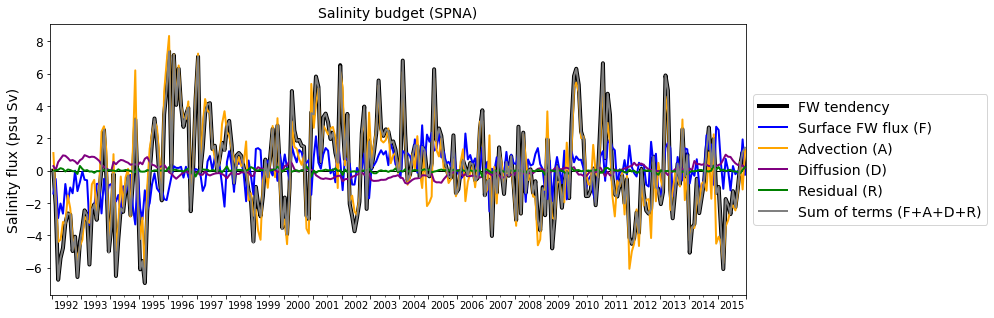

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title(r'Salinity budget (SPNA)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgS.time, budgS.sel(region='spna',term='tendS'), lw=4, color='black',label='FW tendency')
ax.plot(budgS.time, budgS.sel(region='spna',term='forcS'), lw=2, color='blue',label='Surface FW flux (F)')
ax.plot(budgS.time, budgS.sel(region='spna',term='adv_ConvS'), lw=2, color='orange',label='Advection (A)')
ax.plot(budgS.time, budgS.sel(region='spna',term='dif_ConvS'), lw=2, color='purple',label='Diffusion (D)')
ax.plot(budgS.time, budgS.sel(region='spna',term='resS'), lw=2, color='green',label='Residual (R)')

#ax.plot(budgS.time, budgS.sel(region='spna',term='totalS')*1e3, lw=2, color='grey',label='Sum of terms (F+A)')
ax.plot(budgS.time, budgS.sel(region='spna',term=['forcS', 'adv_ConvS', 'dif_ConvS', 'resS']).sum('term'), lw=2, 
        color='grey',label='Sum of terms (F+A+D+R)')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)

ax.set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
ax.set_ylabel('Salinity flux (psu Sv)',fontsize=14)
#plt.ylim([-0.8e7, 1.0e7])
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)
fig.subplots_adjust(right=0.77)

#plt.savefig('/tmp/figure.png')
plt.show()

#### Save to netcdf

In [18]:
ds = budgS.reset_coords(drop=True).to_dataset(name='budg_sln')

In [19]:
ds.to_netcdf('/mnt/efs/data/ecco/ecco_budg_anom_sln.nc', format='NETCDF4')

#### Plots

In [20]:
budgS = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_anom_sln.nc').budg_sln

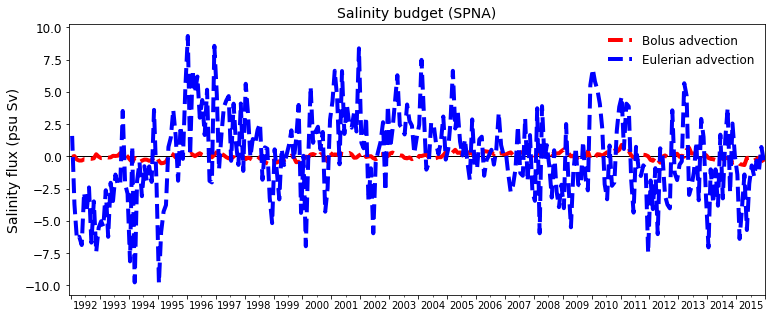

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title(r'Salinity budget (SPNA)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgS.time, budgS.sel(region='spna',term='adv_ConvSb'), lw=4, color='r',ls='--',label='Bolus advection')
ax.plot(budgS.time, budgS.sel(region='spna',term='adv_ConvSe'), lw=4, color='blue',ls='--',label='Eulerian advection')
        
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)

ax.set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
ax.set_ylabel('Salinity flux (psu Sv)',fontsize=14)
#plt.ylim([-0.8e7, 1.0e7])
ax.yaxis.set_tick_params(labelsize=12)
ax.legend(loc='upper right',frameon=False, fancybox=False, ncol=1, fontsize=12)

fig.subplots_adjust(right=0.77)

#plt.savefig('/tmp/figure.png')
plt.show()

In [26]:
budgS_int = (budgS.isel(time=slice(1, -1))*main.isel(time=slice(1, -1)).dt).cumsum(dim='time')

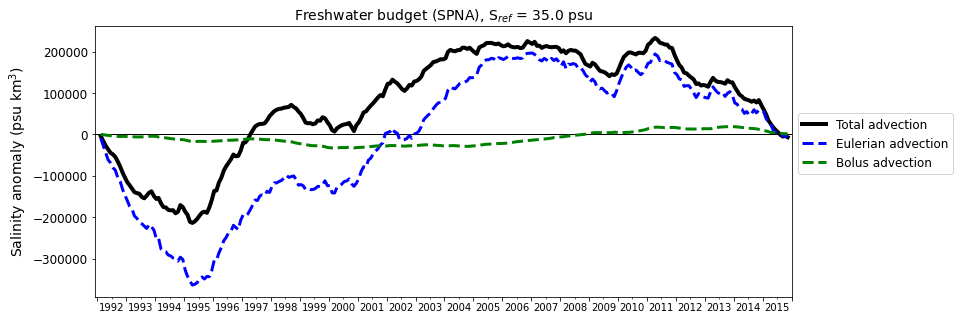

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title(r'Freshwater budget (SPNA), S$_{ref}$ = 35.0 psu',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(budgS_int.time, budgS_int.sel(region='spna',term='adv_ConvS')*1e-3, lw=4, color='k',ls='-',
        label='Total advection')
ax.plot(budgS_int.time, budgS_int.sel(region='spna',term='adv_ConvSe')*1e-3, lw=3, color='blue',ls='--',
        label='Eulerian advection')
ax.plot(budgS_int.time, budgS_int.sel(region='spna',term='adv_ConvSb')*1e-3, lw=3, color='green',ls='--',
        label='Bolus advection')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)

ax.set_xlim([datetime.date(1991, 12, 1), datetime.date(2016, 1, 1)])
ax.set_ylabel('Salinity anomaly (psu km$^3$)',fontsize=14)
#plt.ylim([-0.8e7, 1.0e7])
ax.yaxis.set_tick_params(labelsize=12)
fig.subplots_adjust(right=0.77)
ax.legend(frameon=True, fancybox=True, bbox_to_anchor=(1, 0.7), ncol=1, fontsize=12)

#plt.savefig('/tmp/figure.png')
plt.show()